In [1]:
#Jai Ganesh Deva

### Stock Price Prediction Using LSTM

- A simple stock price prediction application using deep learning.
- This is the basic version, an improved version of this application will be posted soon.


In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
import os
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')


In [58]:
plt.style.available

['seaborn-dark',
 'seaborn-whitegrid',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'seaborn-paper',
 'seaborn-ticks',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-poster',
 'seaborn-white',
 'classic',
 'bmh',
 'seaborn-bright',
 'seaborn-notebook',
 'fivethirtyeight',
 'grayscale',
 'seaborn-muted',
 'seaborn-deep',
 'ggplot',
 'seaborn-pastel',
 'dark_background']

In [3]:
os.chdir("E:\Datasets")

In [4]:
train = pd.read_csv("AAPL train.csv")

In [5]:
test = pd.read_csv("AAPL test.csv")

In [6]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/18/2013,61.651428,62.128571,61.458572,61.681427,48.387424,48756400
1,6/19/2013,61.628571,61.665714,60.428570,60.428570,47.404587,77735000
2,6/20/2013,59.900002,60.854286,59.310001,59.548573,46.714264,89327700
3,6/21/2013,59.784286,60.000000,58.299999,59.071430,46.339951,120279600
4,6/24/2013,58.200001,58.380001,56.864285,57.505714,45.111698,120186500


In [7]:
train.index = range(1,len(train)+1)

In [8]:
test.index = range(1,len(test)+1)

In [9]:
train

,Date,Open,High,Low,Close,Adj Close,Volume
1,6/18/2013,61.651428,62.128571,61.458572,61.681427,48.387424,48756400
2,6/19/2013,61.628571,61.665714,60.428570,60.428570,47.404587,77735000
3,6/20/2013,59.900002,60.854286,59.310001,59.548573,46.714264,89327700
4,6/21/2013,59.784286,60.000000,58.299999,59.071430,46.339951,120279600
5,6/24/2013,58.200001,58.380001,56.864285,57.505714,45.111698,120186500
6,6/25/2013,57.957142,58.255714,56.975716,57.518570,45.121765,78540700
7,6/26/2013,57.700001,57.827145,56.522858,56.867142,44.610741,91931000
8,6/27/2013,57.035713,57.341427,56.220001,56.254284,44.129971,84311500
9,6/28/2013,55.908573,57.181427,55.552856,56.647144,44.438164,144629100
10,7/1/2013,57.527142,58.895714,57.317142,58.459999,45.860298,97763400


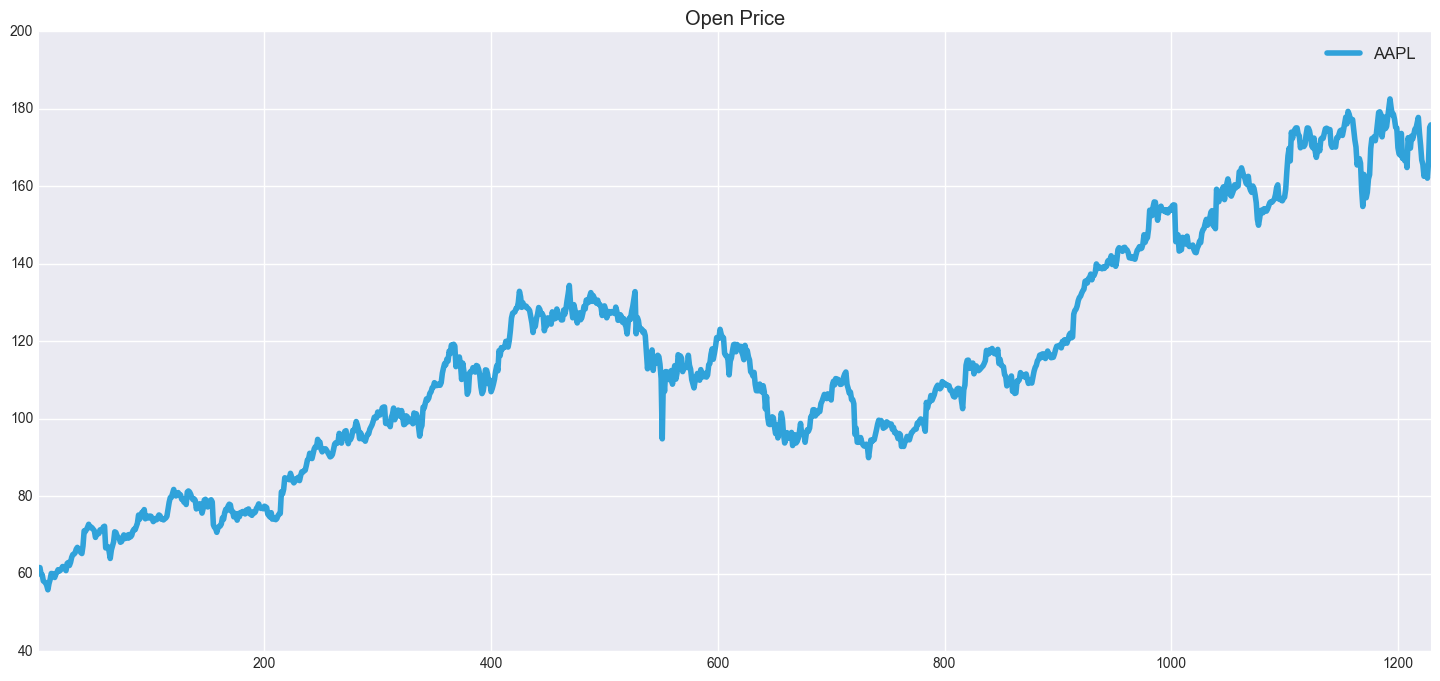

In [60]:
train['Open'].plot(label='AAPL',figsize=(16,8),title='Open Price')
plt.legend()

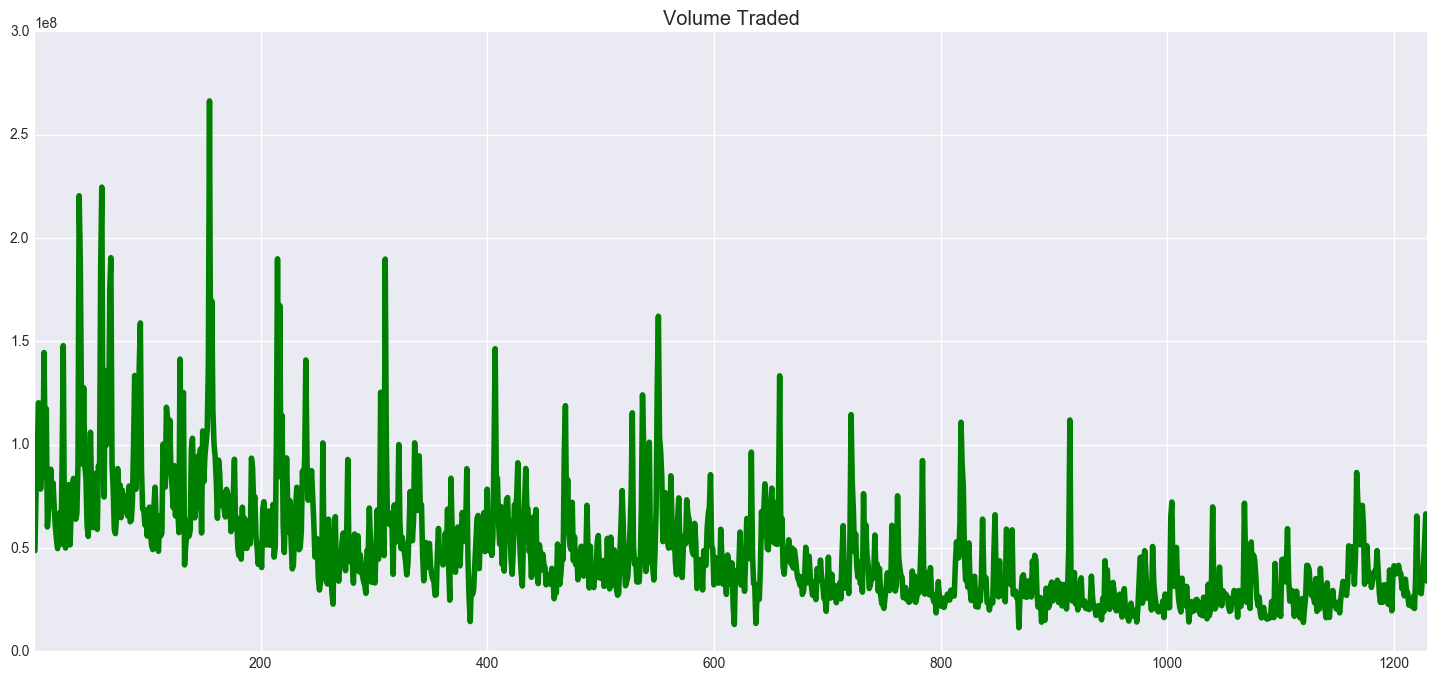

In [61]:
train['Volume'].plot(label='AAPL',figsize=(16,8),title='Volume Traded',color = "g",linestyle='-')

#### Data Preprocessing For LSTM

In [12]:
train_array = train.iloc[:, 1:2].values

In [13]:
train_array

array([[ 61.651428],
       [ 61.628571],
       [ 59.900002],
       ...,
       [166.410004],
       [175.229996],
       [175.880005]])

#### Normalization

In [14]:
scale = MinMaxScaler(feature_range = (0,1))

In [15]:
strain = scale.fit_transform(train_array)

In [16]:
strain

array([[0.04533305],
       [0.04515262],
       [0.03150761],
       ...,
       [0.8722781 ],
       [0.94190151],
       [0.94703256]])

In [17]:
#50 at a time

In [18]:
len(strain)

1229

In [19]:
X_train = []

In [20]:
y_train = []

In [21]:
for i in range(50,1229):
    X_train.append(strain[i - 50:i,0])
    y_train.append(strain[i, 0])
    
        
    

In [22]:
y_train

[0.10672441688628653,
 0.11309586410313699,
 0.11349051549570932,
 0.11473097361718154,
 0.12201585389516834,
 0.12279396324747638,
 0.12075281156259199,
 0.12815049448884075,
 0.12950369210803703,
 0.08530959586710685,
 0.08698987380335954,
 0.08793709240225389,
 0.07853216962995435,
 0.06382714062187322,
 0.08099054902469804,
 0.0894707821524866,
 0.09770288102936775,
 0.11811405055025326,
 0.11673827661377001,
 0.11033298070862374,
 0.10672441688628653,
 0.10422091643223819,
 0.09685714534482304,
 0.09821033507020205,
 0.10630717338879292,
 0.11181030070999443,
 0.10431113486939603,
 0.10735587490203691,
 0.11116751506651446,
 0.10519071924223644,
 0.11272367062059296,
 0.10784080788230488,
 0.11104345583487807,
 0.11970411794316527,
 0.12340290020266032,
 0.12248946714152409,
 0.1292668854848591,
 0.1357849287815468,
 0.15229429495751723,
 0.14393812895518232,
 0.15070423545842238,
 0.15783120781647686,
 0.15526008103019184,
 0.16341328909764463,
 0.14462601987033252,
 0.1507042354

In [23]:
X_tr = np.array(X_train)

In [24]:
y_tr = np.array(y_train)

In [25]:
X_tr.shape

(1179, 50)

In [26]:
y_tr.shape

(1179,)

In [27]:
X_tr

array([[0.04533305, 0.04515262, 0.03150761, ..., 0.12619957, 0.12335779,
        0.12025668],
       [0.04515262, 0.03150761, 0.03059417, ..., 0.12335779, 0.12025668,
        0.10672442],
       [0.03150761, 0.03059417, 0.01808811, ..., 0.12025668, 0.10672442,
        0.11309586],
       ...,
       [0.91924629, 0.91679922, 0.92295639, ..., 0.85420119, 0.85325397,
        0.83849257],
       [0.91679922, 0.92295639, 0.91482577, ..., 0.85325397, 0.83849257,
        0.8722781 ],
       [0.92295639, 0.91482577, 0.92958717, ..., 0.83849257, 0.8722781 ,
        0.94190151]])

In [28]:
#### Converting the 2d array to 3d for RNN

In [29]:
X_tr.shape[1]

50

In [30]:
X_tr = X_tr.reshape(X_tr.shape[0],X_tr.shape[1],1)

In [31]:
X_tr.shape

(1179, 50, 1)

#### Architecture Starts here

In [32]:
model = Sequential()

In [33]:
model.add(LSTM(units = 64, return_sequences= True,input_shape = (X_tr.shape[1],1)))

In [34]:
model.add(Dropout(0.2))

In [35]:
model.add(LSTM(units = 64, return_sequences= True))

In [36]:
model.add(Dropout(0.2))

In [37]:
model.add(LSTM(units = 64, return_sequences= True))

In [38]:
model.add(Dropout(0.2))

In [39]:
model.add(LSTM(units = 64))

In [40]:
model.add(Dropout(0.2))

In [41]:
model.add(Dense(units = 1))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 64)            16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 64)            33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 64)            33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
__________

In [43]:
### Compiling the model

In [44]:
model.compile(optimizer = "adam",loss = "mean_squared_error")

In [45]:
### Fitting the model

In [46]:
model.fit(X_tr,y_tr,epochs = 100,batch_size = 32)

Epoch 1/100
1179/1179 [==============================] - 6s 5ms/step - loss: 0.0354
Epoch 2/100
1179/1179 [==============================] - 3s 2ms/step - loss: 0.0053
Epoch 3/100
1179/1179 [==============================] - 3s 3ms/step - loss: 0.0052
Epoch 4/100
1179/1179 [==============================] - 3s 3ms/step - loss: 0.0039
Epoch 5/100
1179/1179 [==============================] - 3s 3ms/step - loss: 0.0042
Epoch 6/100
1179/1179 [==============================] - 3s 3ms/step - loss: 0.0037
Epoch 7/100
1179/1179 [==============================] - 3s 2ms/step - loss: 0.0038
Epoch 8/100
1179/1179 [==============================] - 3s 3ms/step - loss: 0.0038
Epoch 9/100
1179/1179 [==============================] - 3s 3ms/step - loss: 0.0034
Epoch 10/100
1179/1179 [==============================] - 3s 3ms/step - loss: 0.0031
Epoch 11/100
1179/1179 [==============================] - 3s 3ms/step - loss: 0.0036
Epoch 12/100
1179/1179 [==============================] - 3s 3ms/step - lo

In [47]:
#### Testing 

In [48]:
test_array = test.iloc[:, 1:2].values

In [49]:
total = pd.concat((train["Open"],test["Open"]),axis = 0)

In [50]:
give = total[len(total) - len(test) - 60:].values
give = give.reshape(-1,1)
give = scale.transform(give)


In [51]:
X_test = []
for i in range(50, 80):
    X_test.append(give[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
p_stock = model.predict(X_test)
p_stock = scale.inverse_transform(p_stock)


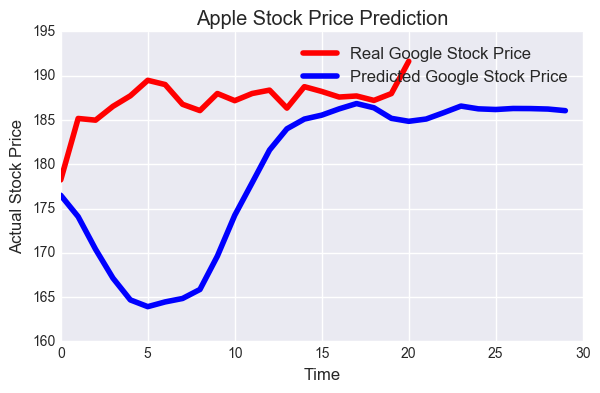

In [62]:
plt.plot(test_array, color = 'red', label = 'Real Google Stock Price')
plt.plot(p_stock, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend()
plt.show()
